In [1]:
import sys
sys.path.insert(0, '/home/zhuoyan/vision/meta_dataset')
import time
import datasets
import os
import time
import json
import torch

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch.nn.functional as F
from collections import defaultdict

from distance_tools import load_test_features, simfunc, compute_mahalanobis_distance, MeanEmbeddingSimilarity,load_train_task_features

In [ ]:
all = ['traffic_sign', 'mscoco', 'ilsvrc_2012', 'omniglot', 'aircraft', 'cu_birds', 'dtd', 'quickdraw', 'fungi', 'vgg_flower']
target = 'traffic_sign'
trsource = ['ilsvrc_2012', 'omniglot', 'aircraft', 'cu_birds', 'dtd', 'quickdraw', 'fungi', 'vgg_flower']

In [2]:
div_by_tasks_cached_file = "/datadrive2/datasets/meta_dataset_taskEmb/100_per_domain/traffic_sign_div_by_tasks.npy"

In [4]:
final = np.load(div_by_tasks_cached_file)
final.shape

(10, 700)

In [15]:
final[2].shape

(700,)

In [16]:
distances = 1/np.array([-i if i < 0 else i for i in final.mean(0)])
sns.lineplot(distances)

<Axes: >

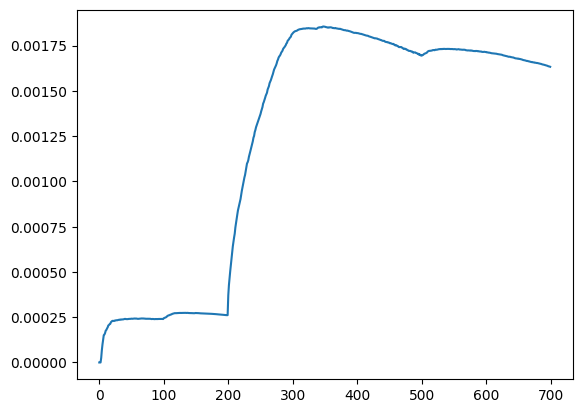

In [17]:
sns.lineplot(distances)

## all domains

<Axes: >

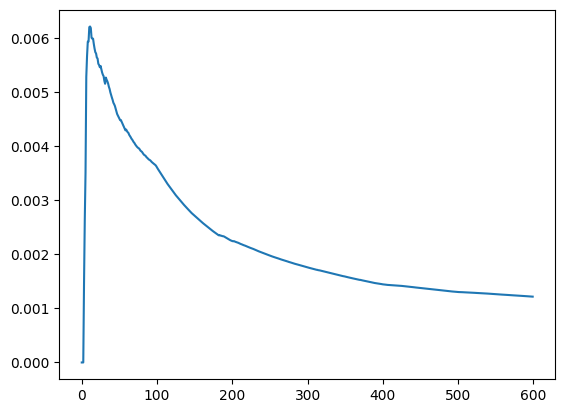

In [2]:
all = ['traffic_sign', 'mscoco', 'ilsvrc_2012', 'omniglot', 'aircraft', 'cu_birds', 'quickdraw', 'fungi', 'vgg_flower']

target = 'aircraft'
div_by_tasks_cached_file = f"/datadrive2/datasets/meta_dataset_taskEmb/100_per_domain/{target}_div_by_tasks.npy"
final = np.load(div_by_tasks_cached_file)
distances = 1/np.array([-i if i < 0 else i for i in final.mean(0)])
sns.lineplot(distances)

In [11]:
distances[5:40]

array([0.00350758, 0.00527311, 0.00565924, 0.00592754, 0.00592852,
       0.00619629, 0.00620804, 0.00617951, 0.0059991 , 0.00598213,
       0.00598358, 0.00588369, 0.0057999 , 0.00573288, 0.00570951,
       0.00563357, 0.00561646, 0.0055189 , 0.00549635, 0.00545479,
       0.0054789 , 0.00542101, 0.00535918, 0.00531706, 0.00529032,
       0.00520459, 0.00514918, 0.00526401, 0.00522433, 0.00519525,
       0.00515402, 0.00509442, 0.00505246, 0.00498973, 0.00494053])

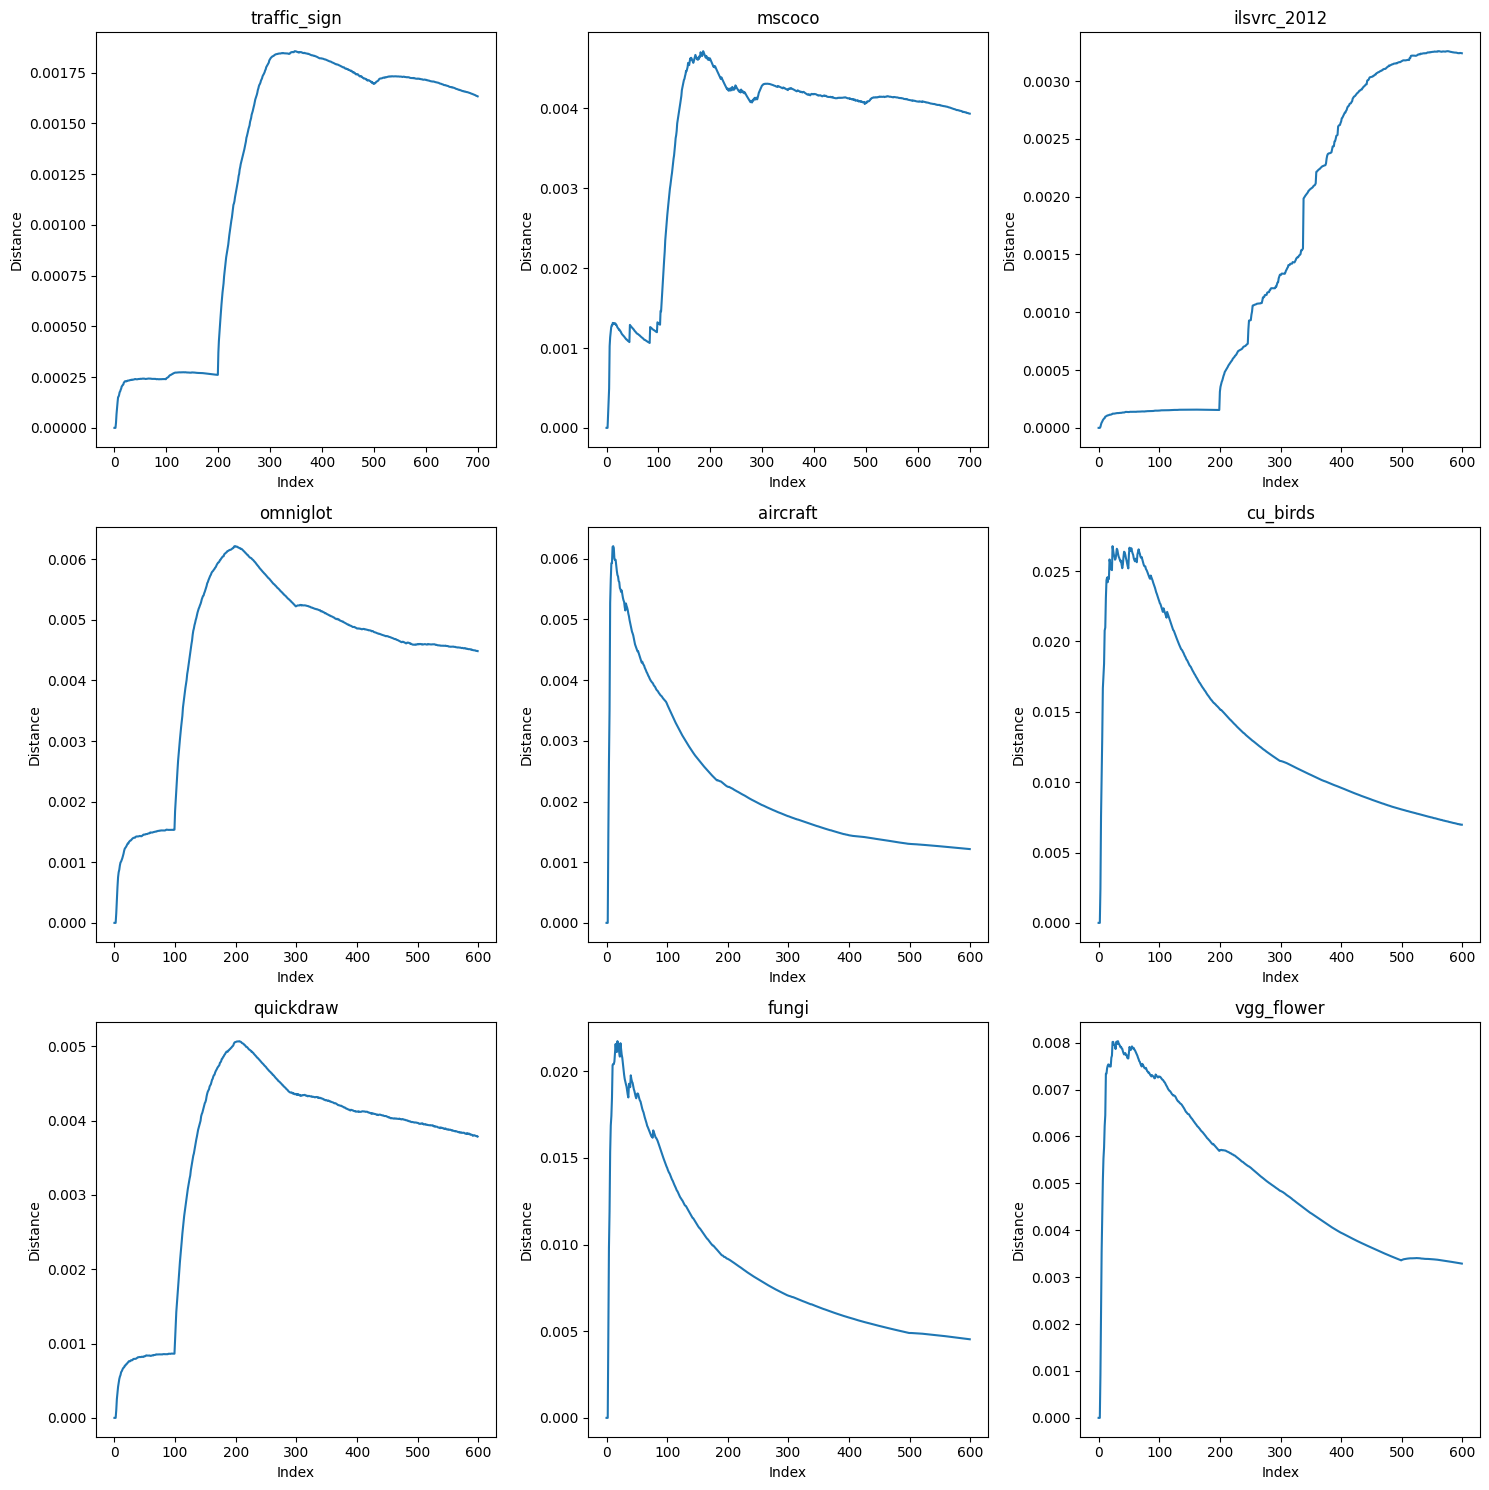

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

all_domains = ['traffic_sign', 'mscoco', 'ilsvrc_2012', 'omniglot', 'aircraft', 'cu_birds', 'quickdraw', 'fungi', 'vgg_flower']

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.ravel()  # Flatten the axes array

for idx, target in enumerate(all_domains):
    div_by_tasks_cached_file = f"/datadrive2/datasets/meta_dataset_taskEmb/100_per_domain/{target}_div_by_tasks.npy"
    final = np.load(div_by_tasks_cached_file)
    distances = 1/np.array([-i if i < 0 else i for i in final.mean(0)])
    
    sns.lineplot(x=range(len(distances)), y=distances, ax=axs[idx])
    axs[idx].set_title(target)
    axs[idx].set_ylabel('Distance')
    axs[idx].set_xlabel('Index')

plt.tight_layout()
plt.show()
